In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/YKMpgL4avRjQgoPKXoKBgBvy7/Historical_Data.csv'
               ,parse_dates=True,index_col='Date')

In [3]:
#at fi fr se
#chronological order

In [4]:
at=df[df['Country_Code']=='AT']
at=at[['Sold_Units']]

In [5]:
at=at.groupby('Date').count()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    plt.grid(True)
    orig = plt.plot(timeseries, color='tab:blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

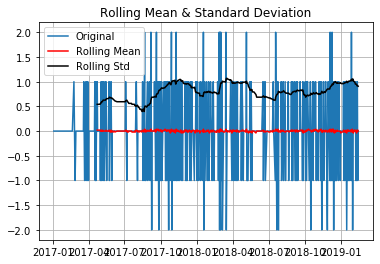

Results of Dickey-Fuller Test:
p_value:  1.2011104193400289e-17


In [9]:
test_stationarity(at.Sold_Units.diff().dropna())
plt.show()

In [10]:
atm=at.Sold_Units.diff()

In [11]:
atm=atm.dropna()

In [12]:

# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(atm, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

In [13]:
order_aic_bic

[(0, 0, 1298.1847640287422, 1306.7530323508838),
 (0, 1, 962.1013135874202, 974.9537160706326),
 (0, 2, 964.014274781295, 981.1508114255781),
 (0, 3, None, None),
 (0, 4, None, None),
 (1, 0, 1141.1268123275086, 1153.979214810721),
 (1, 1, 964.008610291733, 981.1451469360162),
 (1, 2, 964.359231138153, 985.779901943507),
 (1, 3, 965.633970619793, 991.3387755862178),
 (1, 4, 967.6223891333424, 997.611328260838),
 (2, 0, 1086.8863812165976, 1104.0229178608809),
 (2, 1, 965.5102214252104, 986.9308922305644),
 (2, 2, 965.6258821273065, 991.3306870937313),
 (2, 3, 961.7062912886586, 991.6952304161542),
 (2, 4, 954.2818921400379, 988.5549654286043),
 (3, 0, 1061.1448182876563, 1082.5654890930105),
 (3, 1, 967.5099299471598, 993.2147349135846),
 (3, 2, 967.6108640616178, 997.5998031891135),
 (3, 3, 961.391533635501, 995.6646069240674),
 (3, 4, None, None),
 (4, 0, 1037.0586809942138, 1062.7634859606385),
 (4, 1, 969.3151016861734, 999.3040408136691),
 (4, 2, 969.2322007622607, 1003.5052740508

In [14]:
model = ARMA(atm, order=(2, 4))
results = model.fit()

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [15]:
y_pred=results.predict().tail(10)
y=at.Sold_Units.tail(10)

In [16]:
at.Sold_Units.tail(11)
cum_preds = 2+y_pred.cumsum()

In [17]:
cum_preds
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,cum_preds)

In [18]:
cum_preds

Date
2019-02-04    1.869188
2019-02-05    1.405353
2019-02-06    1.289306
2019-02-07   -0.018631
2019-02-08   -0.156481
2019-02-09   -0.402934
2019-02-10    0.348755
2019-02-11    0.170307
2019-02-12   -0.984536
2019-02-13   -1.136109
dtype: float64

In [19]:
y

Date
2019-02-04    2
2019-02-05    2
2019-02-06    3
2019-02-07    2
2019-02-08    2
2019-02-09    1
2019-02-10    2
2019-02-11    3
2019-02-12    2
2019-02-13    2
Name: Sold_Units, dtype: int64

In [20]:
error

1.8615782963104486

In [21]:
#for fi

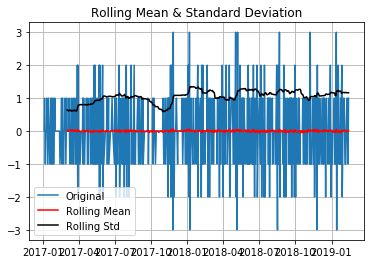

Results of Dickey-Fuller Test:
p_value:  1.841734557809165e-17


In [22]:
at=df[df['Country_Code']=='FI']
at=at[['Sold_Units']]
at=at.groupby('Date').count()
test_stationarity(at.Sold_Units.diff().dropna())
plt.show()
atm=at.Sold_Units.diff()
atm=atm.dropna()


In [ ]:
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(atm, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

In [ ]:
order_aic_bic

In [ ]:
model = ARMA(atm, order=(0,2))
results = model.fit()
y_pred=results.predict().tail(10)
y=at.Sold_Units.tail(10)
cum_preds = 2+y_pred.cumsum()
cum_preds
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,cum_preds)

In [ ]:
# for fr

In [ ]:
at=df[df['Country_Code']=='FR']
at=at[['Sold_Units']]
at=at.groupby('Date').count()
test_stationarity(at.Sold_Units.diff().dropna())
plt.show()
atm=at.Sold_Units.diff()
atm=atm.dropna()



In [ ]:
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(atm, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

In [ ]:
order_aic_bic

In [ ]:
model = ARMA(atm, order=(0,2))
results = model.fit()
y_pred=results.predict().tail(10)
y=at.Sold_Units.tail(10)
print(at.Sold_Units.tail(11))
cum_preds = 4+y_pred.cumsum()
cum_preds
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,cum_preds)

In [ ]:
error

In [ ]:
#for se

In [ ]:
at=df[df['Country_Code']=='SE']
at=at[['Sold_Units']]
at=at.groupby('Date').count()
test_stationarity(at.Sold_Units.diff().dropna())
plt.show()
atm=at.Sold_Units.diff()
atm=atm.dropna()

In [ ]:
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(atm, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

In [ ]:
order_aic_bic

In [ ]:
model = ARMA(atm, order=(0,2))
results = model.fit()
y_pred=results.predict().tail(10)
y=at.Sold_Units.tail(10)
print(at.Sold_Units.tail(11))
cum_preds = 3+y_pred.cumsum()
cum_preds
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,cum_preds)

In [ ]:
error

In [ ]:
output=[error]

In [ ]:
output=np.round(output,2)

In [ ]:
output